# <center> <h1> 🌷🌻 🌸 🌼🌺  👨‍💻 🌺 🌼 🌸🌻 🌷

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
import glob
import os

# <center> Method 1. We create a function ourselves

In [2]:
# the folder where the dataset resides
train_data_dir = "Datasets/flower_photos/train"
test_data_dir = "Datasets/flower_photos/test"

In [3]:
def load_data(path):
    
    x = []
    y = []
    
    classes = ["daisy", "dandelion", "roses", "sunflowers", "tulips"] 
    
    for i in classes:
        for j in glob.glob(os.path.join(path, i,"*")):  # get the path to the image from the desired folder
            try:
                rasm = cv2.imread(j)  # read image
                rasm = cv2.cvtColor(rasm, cv2.COLOR_BGR2RGB) # convert bgr to rgb
                rasm = cv2.resize(rasm, (224,224))  # resize mage 224,224,
                
                x.append(rasm)
                # append class number
                if classes[0]==i:
                    y.append(0)
                elif classes[1]==i:
                    y.append(1)
                elif classes[2]==i:
                    y.append(2)
                elif classes[3]==i:
                    y.append(3)
                elif classes[4]==i:
                    y.append(4)
                    
            except:
                pass
            
    return np.array(x), np.array(y)

In [4]:
x_train, y_train = load_data(train_data_dir)

In [5]:
x_test, y_test = load_data(test_data_dir)

In [11]:
len(x_train)
# len train images

2500

In [12]:
len(x_test)
# len test images

100

In [13]:
x_train.shape

(2500, 224, 224, 3)

In [14]:
y_train.shape

(2500,)

In [15]:
x_test.shape

(100, 224, 224, 3)

In [16]:
y_test.shape

(100,)

In [17]:
x_train[0]

array([[[212, 216, 223],
        [207, 213, 219],
        [209, 211, 218],
        ...,
        [  6,   8,  11],
        [ 10,   8,  13],
        [  7,   7,  12]],

       [[215, 220, 227],
        [217, 221, 228],
        [216, 216, 224],
        ...,
        [ 10,  10,  15],
        [ 13,  11,  16],
        [  8,   8,  12]],

       [[217, 219, 226],
        [217, 217, 225],
        [222, 225, 233],
        ...,
        [  7,   6,  11],
        [  4,   5,  10],
        [  6,   7,  11]],

       ...,

       [[202, 208, 212],
        [209, 213, 217],
        [218, 227, 230],
        ...,
        [175, 168, 155],
        [184, 175, 166],
        [177, 166, 161]],

       [[222, 227, 231],
        [225, 228, 235],
        [221, 228, 233],
        ...,
        [177, 169, 157],
        [182, 172, 162],
        [173, 164, 157]],

       [[229, 232, 239],
        [227, 231, 237],
        [229, 232, 239],
        ...,
        [176, 168, 153],
        [184, 170, 161],
        [172, 158, 155]]

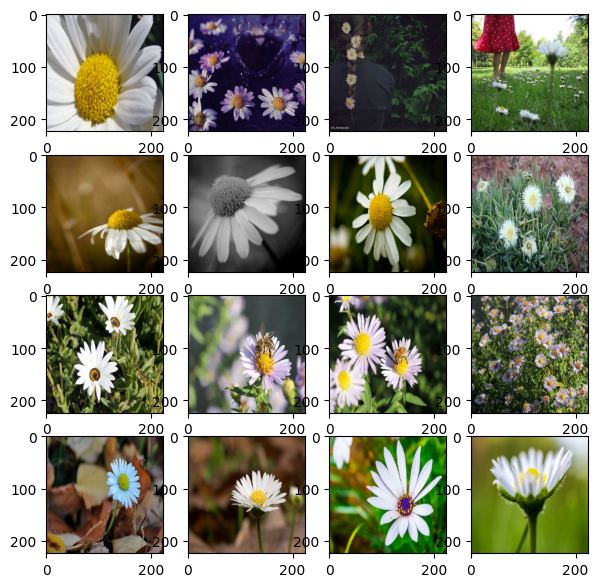

In [18]:
plt.figure(figsize=(7,7))
for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])

In [13]:
type(x_train)

numpy.ndarray

## <center> We train the model in VGG16

In [6]:
vgg16 = VGG16(include_top=False, input_shape=(224,224,3))

In [7]:
for i in range(len(vgg16.layers)):
    vgg16.layers[i].trainable = False

In [8]:
new_model_vgg16 = Sequential([
    vgg16,
    Flatten(),
    #Dense(100, activation="relu"),
    Dense(5, activation="softmax")
])

In [9]:
new_model_vgg16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 5)                 125445    
                                                                 
Total params: 14,840,133
Trainable params: 125,445
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
new_model_vgg16.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

In [11]:
new_model_vgg16.fit(x_train, y_train, epochs=10,  batch_size=16)

Epoch 1/10
157/157 [==============================] - 32s 133ms/step - loss: 8.9625 - accuracy: 0.7316
Epoch 2/10
157/157 [==============================] - 19s 122ms/step - loss: 2.7839 - accuracy: 0.9112
Epoch 3/10
157/157 [==============================] - 19s 123ms/step - loss: 0.6845 - accuracy: 0.9688
Epoch 4/10
157/157 [==============================] - 19s 124ms/step - loss: 0.6740 - accuracy: 0.9752
Epoch 5/10
157/157 [==============================] - 24s 152ms/step - loss: 0.8301 - accuracy: 0.9760
Epoch 6/10
157/157 [==============================] - 29s 186ms/step - loss: 0.4348 - accuracy: 0.9796
Epoch 7/10
157/157 [==============================] - 29s 185ms/step - loss: 0.6253 - accuracy: 0.9820
Epoch 8/10
157/157 [==============================] - 29s 186ms/step - loss: 0.5411 - accuracy: 0.9892
Epoch 9/10
157/157 [==============================] - 29s 187ms/step - loss: 0.3705 - accuracy: 0.9904
Epoch 10/10
157/157 [==============================] - 29s 186ms/step - l

In [12]:
new_model_vgg16.evaluate(x_test, y_test)

4/4 [==============================] - 8s 162ms/step - loss: 17.5996 - accuracy: 0.8300


[17.599641799926758, 0.8299999833106995]

# <center> Method 2. Read via the image_dataset_from_directory function in tensorflow

In [53]:
train_data_dir = "Datasets/flower_photos/train"
test_data_dir = "Datasets/flower_photos/test"

In [54]:
train_data = image_dataset_from_directory(train_data_dir, image_size=(224,224), batch_size=16)
test_data = image_dataset_from_directory(test_data_dir, image_size=(224,224), batch_size=16)


Found 3490 files belonging to 5 classes.
Found 100 files belonging to 5 classes.


In [55]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [56]:
test_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [57]:
list(train_data)

[(<tf.Tensor: shape=(16, 224, 224, 3), dtype=float32, numpy=
  array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           ...,
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
  
          [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           ...,
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
  
          [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           [0.00000000e+00, 0.00000000e+00, 0

In [58]:
len(list(train_data))
# There are 219 batches, each batch has 16 images

219

In [59]:
list(train_data)[0]
# 0-bacth

(<tf.Tensor: shape=(16, 224, 224, 3), dtype=float32, numpy=
 array([[[[5.71732292e+01, 2.01950348e+02, 6.66486740e+01],
          [5.28816986e+01, 1.96955551e+02, 6.29186287e+01],
          [5.28342056e+01, 1.97873306e+02, 6.06930389e+01],
          ...,
          [7.26176910e+01, 2.21082504e+02, 8.04524994e+01],
          [7.45304031e+01, 2.24287094e+02, 7.67469254e+01],
          [7.15810547e+01, 2.21244339e+02, 7.45654526e+01]],
 
         [[5.67678566e+01, 2.04227676e+02, 6.77299118e+01],
          [5.32944221e+01, 1.98836243e+02, 6.53035736e+01],
          [5.50659676e+01, 2.00839279e+02, 6.51166916e+01],
          ...,
          [7.07466202e+01, 2.19965973e+02, 7.62208176e+01],
          [7.14506836e+01, 2.22418823e+02, 7.64991837e+01],
          [7.11694260e+01, 2.20795639e+02, 7.51870880e+01]],
 
         [[5.76679497e+01, 2.05234909e+02, 6.86835709e+01],
          [4.99275742e+01, 1.95494553e+02, 6.26453285e+01],
          [5.24959946e+01, 1.96513382e+02, 6.24611969e+01],
    

In [60]:
len(list(train_data)[0])
# batch 0 is 2 because 1 is images and 2 is labels

2

In [61]:
list(train_data)[0][0][0]
# image 0 of 16 images of Batch 0

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[174.75    , 198.      , 229.875   ],
        [174.14732 , 198.60268 , 229.875   ],
        [172.54019 , 199.80804 , 229.9375  ],
        ...,
        [ 38.81698 ,  49.883926,  17.723282],
        [ 37.03129 ,  52.10273 ,  15.888403],
        [ 63.638985,  82.99619 ,  35.49604 ]],

       [[170.20982 , 197.95982 , 227.77232 ],
        [170.0625  , 197.8125  , 227.625   ],
        [167.94643 , 197.9866  , 227.59375 ],
        ...,
        [ 36.99549 ,  48.03566 ,  17.736626],
        [ 39.321484,  54.32596 ,  18.31253 ],
        [ 67.81753 ,  86.987236,  40.049583]],

       [[165.53572 , 197.78572 , 226.47322 ],
        [164.75    , 197.      , 226.0893  ],
        [163.375   , 197.6384  , 226.4107  ],
        ...,
        [ 36.44632 ,  48.24092 ,  18.508865],
        [ 38.218796,  52.732197,  18.526814],
        [ 55.83513 ,  73.701256,  30.384144]],

       ...,

       [[180.52232 , 216.08482 ,  51.348213],
        [157.

In [66]:
list(train_data)[0][0][0].shape
# image size 0 of 16 images of batch 0i

TensorShape([224, 224, 3])

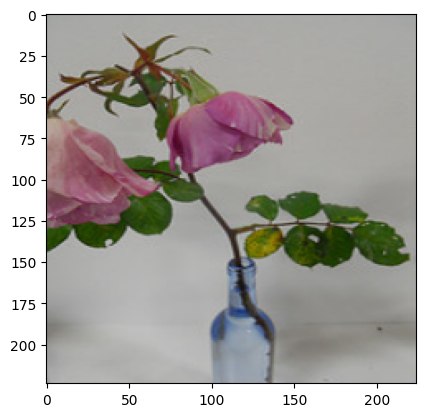

In [67]:
plt.imshow(list(train_data)[0][0][0].numpy().astype("uint8"))

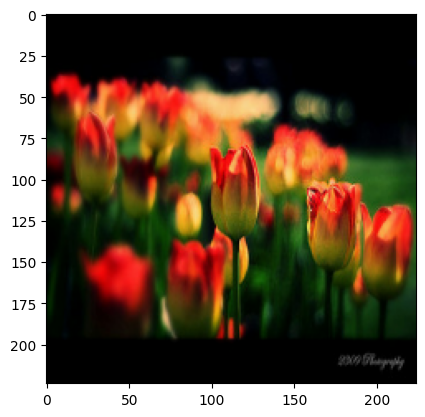

In [68]:
plt.imshow(list(train_data)[0][0][0].numpy().astype("uint8"))
# shows us a different picture each time because shuffle=True

In [69]:
classes = train_data.class_names
classes

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [70]:
list(train_data)[0][1]
# bacth image labels

<tf.Tensor: shape=(16,), dtype=int32, numpy=array([3, 4, 4, 3, 3, 1, 1, 4, 1, 1, 2, 4, 3, 1, 0, 1])>

In [71]:
list(train_data)[0][1]
# these also come out different every time. That is, it releases different batches every time

<tf.Tensor: shape=(16,), dtype=int32, numpy=array([1, 4, 1, 2, 1, 3, 2, 3, 4, 2, 2, 2, 2, 3, 1, 4])>

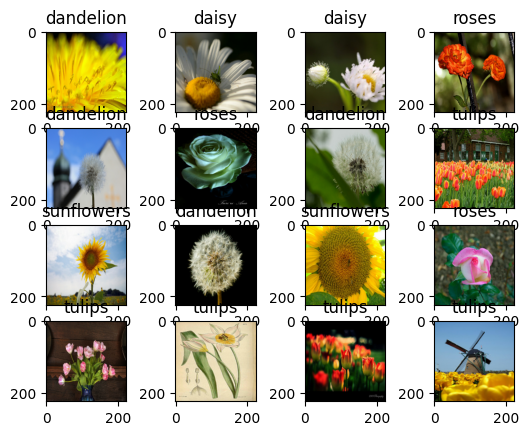

In [72]:
for rasm, label in train_data.take(1):
    
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.title(classes[label[i]])
        plt.imshow(rasm[i].numpy().astype("uint8"))

## <center> We train the model in VGG16

In [79]:
vgg16 = VGG16(include_top=False, input_shape=(224,224,3))

In [80]:
for i in range(len(vgg16.layers)):
    vgg16.layers[i].trainable = False

In [81]:
new_model_vgg16 = Sequential([
    vgg16,
    Flatten(),
    #Dense(100, activation="relu"),
    Dense(5, activation="softmax")
])

In [82]:
new_model_vgg16.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 5)                 125445    
                                                                 
Total params: 14,840,133
Trainable params: 125,445
Non-trainable params: 14,714,688
_________________________________________________________________


In [83]:
new_model_vgg16.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")


In [84]:
with tf.device(":/GPU:0"):
    new_model_vgg16.fit(train_data, epochs=10,  batch_size=16)
    

Epoch 1/10
219/219 [==============================] - 42s 183ms/step - loss: 9.3291 - accuracy: 0.7361
Epoch 2/10
219/219 [==============================] - 53s 240ms/step - loss: 2.5802 - accuracy: 0.9218
Epoch 3/10
219/219 [==============================] - 41s 185ms/step - loss: 1.0624 - accuracy: 0.9633
Epoch 4/10
219/219 [==============================] - 40s 184ms/step - loss: 0.5904 - accuracy: 0.9797
Epoch 5/10
219/219 [==============================] - 40s 182ms/step - loss: 0.4282 - accuracy: 0.9842
Epoch 6/10
219/219 [==============================] - 40s 182ms/step - loss: 0.4697 - accuracy: 0.9860
Epoch 7/10
219/219 [==============================] - 40s 183ms/step - loss: 0.4010 - accuracy: 0.9862
Epoch 8/10
219/219 [==============================] - 64s 293ms/step - loss: 0.4156 - accuracy: 0.9865
Epoch 9/10
219/219 [==============================] - 80s 366ms/step - loss: 0.8138 - accuracy: 0.9756
Epoch 10/10
219/219 [==============================] - 90s 411ms/step - l

In [85]:
new_model_vgg16.evaluate(test_data)

7/7 [==============================] - 5s 574ms/step - loss: 22.7186 - accuracy: 0.8300


[22.71857452392578, 0.8299999833106995]

# <center> Method 3. We can read it as a BatchDataset and convert to numpy

In [2]:
train_data_dir = "Datasets/flower_photos/train"
test_data_dir = "Datasets/flower_photos/test"

In [3]:
train_data = image_dataset_from_directory(train_data_dir, image_size=(224,224), batch_size=16)
test_data = image_dataset_from_directory(test_data_dir, image_size=(224,224), batch_size=16)


Found 2500 files belonging to 5 classes.
Found 100 files belonging to 5 classes.


In [4]:
x_train = []
y_train = []
# convert to list
for i in train_data:
    for j in i[0]:
        a = j / 255
        x_train.append(a)
        
    for j in i[1]:
        y_train.append(j)

In [6]:
x_train

[<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.05471681, 0.05471681, 0.05471681],
         [0.063104  , 0.063104  , 0.063104  ],
         [0.07408088, 0.07408088, 0.07408088],
         ...,
         [0.1382945 , 0.1382945 , 0.1382945 ],
         [0.15745802, 0.15745802, 0.15745802],
         [0.16192363, 0.16192363, 0.16192363]],
 
        [[0.06454832, 0.06454832, 0.06454832],
         [0.07179622, 0.07179622, 0.07179622],
         [0.09157038, 0.09157038, 0.09157038],
         ...,
         [0.153055  , 0.153055  , 0.153055  ],
         [0.15702352, 0.15702352, 0.15702352],
         [0.15792191, 0.15792191, 0.15792191]],
 
        [[0.0750329 , 0.0750329 , 0.0750329 ],
         [0.08345588, 0.08345588, 0.08345588],
         [0.10344013, 0.10344013, 0.10344013],
         ...,
         [0.15654764, 0.15654764, 0.15654764],
         [0.15626748, 0.15626748, 0.15626748],
         [0.15209208, 0.15209208, 0.15209208]],
 
        ...,
 
        [[0.0612395 , 0.0612395 

In [7]:
y_train

[<tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>,
 <tf.Tensor: shape=(), dtype=int32, numpy=4>,
 <tf.Tensor: shape=(), dtype=int32, numpy=4>,
 <tf.Tensor: shape=(), dtype=int32, numpy=3>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=4>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>,
 <tf.Tensor: shape=(), dtype=int32, numpy=4>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=3>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=4>,
 <tf.Tensor: shape=(), dtype=int32

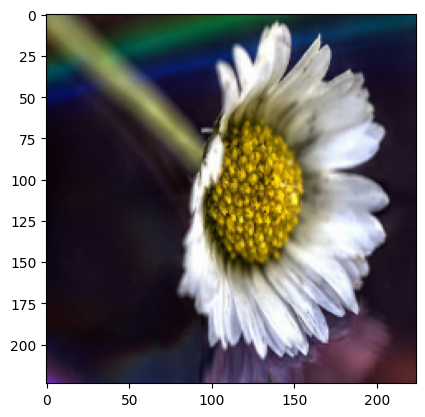

In [8]:
plt.imshow(x_train[1])

In [4]:
x_test = []
y_test = []
# convert to list
for i in test_data:
    
    for j in i[0]:
        a = j / 255
        x_test.append(a)
        
    for j in i[1]:
        y_test.append(j)

In [10]:
x_test

[<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.00000000e+00, 2.91316546e-02, 0.00000000e+00],
         [0.00000000e+00, 3.77250910e-02, 0.00000000e+00],
         [0.00000000e+00, 3.93457375e-02, 0.00000000e+00],
         ...,
         [4.76189107e-02, 1.17367014e-01, 2.38093883e-02],
         [5.25710471e-02, 1.26100481e-01, 2.23589763e-02],
         [6.43159822e-02, 1.42887414e-01, 3.34735624e-02]],
 
        [[0.00000000e+00, 2.97919177e-02, 0.00000000e+00],
         [0.00000000e+00, 3.55642252e-02, 0.00000000e+00],
         [0.00000000e+00, 3.52641046e-02, 0.00000000e+00],
         ...,
         [4.79490645e-02, 1.17787182e-01, 1.66365243e-02],
         [5.78531772e-02, 1.35704353e-01, 2.08883751e-02],
         [6.96580410e-02, 1.52010992e-01, 2.97820754e-02]],
 
        [[0.00000000e+00, 3.59943993e-02, 7.00279314e-04],
         [0.00000000e+00, 3.80652212e-02, 7.00279314e-04],
         [0.00000000e+00, 3.50140072e-02, 0.00000000e+00],
         ...,
         [5

In [11]:
y_test

[<tf.Tensor: shape=(), dtype=int32, numpy=4>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>,
 <tf.Tensor: shape=(), dtype=int32, numpy=3>,
 <tf.Tensor: shape=(), dtype=int32, numpy=3>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=4>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>,
 <tf.Tensor: shape=(), dtype=int32, numpy=3>,
 <tf.Tensor: shape=(), dtype=int32, numpy=3>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>,
 <tf.Tensor: shape=(), dtype=int32, numpy=4>,
 <tf.Tensor: shape=(), dtype=int32, numpy=4>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=4>,
 <tf.Tensor: shape=(), dtype=int32, numpy=4>,
 <tf.Tensor: shape=(), dtype=int32

In [6]:
# convert to numpy
x_train = np.array(x_train, dtype=np.float32)
x_train

array([[[[5.46743684e-02, 3.47285092e-01, 7.85590410e-01],
         [1.44130308e-02, 3.65445971e-01, 7.96528816e-01],
         [7.47395083e-02, 3.47474456e-01, 8.02720249e-01],
         ...,
         [8.55740309e-01, 8.79584789e-01, 9.42960143e-01],
         [8.94817948e-01, 9.12557304e-01, 9.56359029e-01],
         [9.13322926e-01, 9.29009199e-01, 9.72146451e-01]],

        [[6.98609129e-02, 3.48858863e-01, 7.90691078e-01],
         [2.98199747e-02, 3.62599522e-01, 7.98506379e-01],
         [6.05440661e-02, 3.52597386e-01, 7.94161439e-01],
         ...,
         [8.50148916e-01, 8.73993456e-01, 9.37368751e-01],
         [8.74795556e-01, 8.98485720e-01, 9.45222974e-01],
         [8.99899840e-01, 9.15586114e-01, 9.60486710e-01]],

        [[7.77289793e-02, 3.50654095e-01, 7.88830519e-01],
         [5.09254485e-02, 3.61117870e-01, 8.02010894e-01],
         [4.95149679e-02, 3.58520746e-01, 7.92403758e-01],
         ...,
         [8.37106168e-01, 8.60169828e-01, 9.25955951e-01],
         [

In [7]:
# convert to numpy
y_train = np.array(y_train, dtype=np.uint8)
y_train

array([4, 2, 2, ..., 2, 0, 0], dtype=uint8)

In [5]:
# convert to numpy
x_test = np.array(x_test, dtype=np.float32)
x_test

array([[[[0.21144216, 0.2719087 , 0.16599   ],
         [0.20316799, 0.27427346, 0.15056899],
         [0.19814847, 0.27874652, 0.15567017],
         ...,
         [0.28262013, 0.3218071 , 0.23889177],
         [0.26979238, 0.31885105, 0.23863387],
         [0.2492094 , 0.30829826, 0.20665994]],

        [[0.21613272, 0.2788778 , 0.16816352],
         [0.2149008 , 0.2756819 , 0.15440536],
         [0.20577879, 0.2816089 , 0.15557356],
         ...,
         [0.2715623 , 0.31893626, 0.23375195],
         [0.25596112, 0.30753678, 0.2273196 ],
         [0.24511859, 0.31116065, 0.20659524]],

        [[0.21385469, 0.27659976, 0.16588551],
         [0.21628152, 0.27510506, 0.15446913],
         [0.201278  , 0.27906162, 0.15195562],
         ...,
         [0.26238978, 0.3171131 , 0.2277941 ],
         [0.24902444, 0.30823463, 0.21765189],
         [0.23908433, 0.31150422, 0.20653212]],

        ...,

        [[0.48111662, 0.42451668, 0.4253657 ],
         [0.4684524 , 0.4132927 , 0.41342157]

In [6]:
# convert to numpy
y_test = np.array(y_test, dtype=np.uint8)
y_test

array([4, 1, 2, 2, 3, 1, 3, 2, 0, 3, 2, 0, 3, 2, 0, 0, 4, 3, 3, 3, 4, 1,
       2, 4, 2, 4, 4, 0, 1, 0, 4, 1, 2, 3, 2, 4, 3, 4, 1, 4, 1, 3, 2, 3,
       1, 1, 0, 0, 4, 3, 2, 0, 2, 0, 1, 4, 2, 2, 4, 0, 4, 0, 1, 4, 3, 4,
       2, 3, 0, 2, 1, 1, 3, 1, 0, 0, 4, 3, 0, 2, 1, 0, 4, 3, 2, 2, 1, 3,
       1, 0, 4, 0, 1, 2, 1, 3, 4, 1, 3, 0], dtype=uint8)

In [16]:
x_train.shape

(2500, 224, 224, 3)

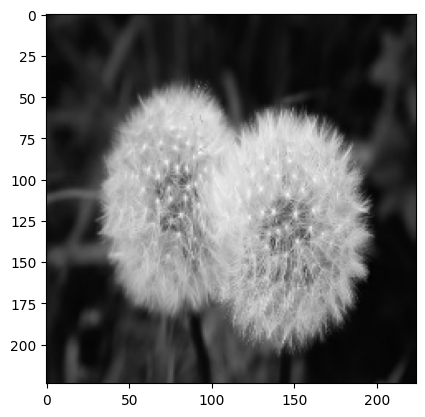

In [17]:
plt.imshow(x_train[0])

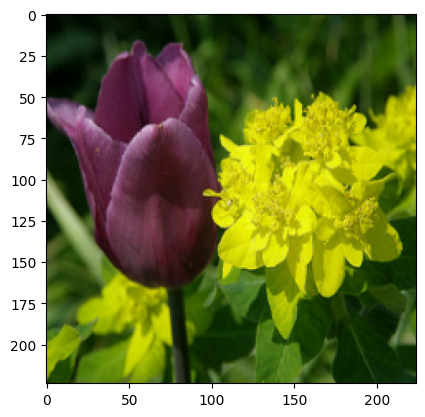

In [18]:
plt.imshow(x_test[0])

## <center> We train the model in VGG16

In [8]:
vgg16 = VGG16(include_top=False, input_shape=(224,224,3))

In [9]:
for i in range(len(vgg16.layers)):
    vgg16.layers[i].trainable = False

In [10]:
new_model_vgg16 = Sequential([
    vgg16,
    Flatten(),
    #Dense(100, activation="relu"),
    Dense(5, activation="softmax")
])

In [11]:
new_model_vgg16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 5)                 125445    
                                                                 
Total params: 14,840,133
Trainable params: 125,445
Non-trainable params: 14,714,688
_________________________________________________________________


In [12]:
new_model_vgg16.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

In [13]:
with tf.device(":/GPU:0"):
    new_model_vgg16.fit(x_train, y_train, epochs=10,  batch_size=16)

Epoch 1/10
157/157 [==============================] - 33s 135ms/step - loss: 0.8710 - accuracy: 0.6960
Epoch 2/10
157/157 [==============================] - 20s 127ms/step - loss: 0.2580 - accuracy: 0.9116
Epoch 3/10
157/157 [==============================] - 20s 127ms/step - loss: 0.1146 - accuracy: 0.9668
Epoch 4/10
157/157 [==============================] - 20s 128ms/step - loss: 0.0698 - accuracy: 0.9872
Epoch 5/10
157/157 [==============================] - 20s 128ms/step - loss: 0.0282 - accuracy: 0.9988
Epoch 6/10
157/157 [==============================] - 20s 129ms/step - loss: 0.0207 - accuracy: 0.9992
Epoch 7/10
157/157 [==============================] - 20s 129ms/step - loss: 0.0172 - accuracy: 0.9996
Epoch 8/10
157/157 [==============================] - 20s 128ms/step - loss: 0.0168 - accuracy: 0.9992
Epoch 9/10
157/157 [==============================] - 20s 128ms/step - loss: 0.0152 - accuracy: 0.9992
Epoch 10/10
157/157 [==============================] - 20s 128ms/step - l

In [8]:
new_model_vgg16.evaluate(x_test, y_test)

4/4 [==============================] - 15s 770ms/step - loss: 0.7633 - accuracy: 0.8300


[0.7633101940155029, 0.8299999833106995]

# <center> Conclusion
###   ` If we read using our function, we consistently read the drawing in class, and when teaching, we also read each class sequentially `
### `If we read through a batch dataset our dataset will be shuffled, i.e. we have images not sequentially across classes always taught differently.`
### `Converting a batch dataset to numpy helps us save data that was in random order, that is, we can't always get new data, as in method 2, we save data that was in the first random order.  `

`Our accuracy was the same in any training. How we feed the images to the neural network depends on us and the problem being solved`

# <center> <h1> 👨‍💻   🚀  